In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from WFC import WaveFunctionCollapse
import rasterio
import seaborn as sns

In [2]:


def visualize_terrain(terrain, cmap='terrain'):
    """
    Visualize the terrain heightmap using matplotlib.
    
    Args:
        terrain (numpy.ndarray): Terrain heightmap.
        cmap (str, optional): Colormap to use for visualization. Default is 'terrain'.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(terrain, cmap=cmap) #, vmin=0, vmax=1)
    # ax.set_xticks([])
    # ax.set_yticks([])
    fig.colorbar(im, ax=ax)
    plt.show()



def visualize_3d_terrain(terrain, cmap='terrain', elev=45, azim=45, x_scale=30, y_scale=30, z_scale=1):
    """
    Visualize the terrain heightmap in 3D using matplotlib.
    
    Args:
        terrain (numpy.ndarray): Terrain heightmap.
        cmap (str, optional): Colormap to use for visualization. Default is 'terrain'.
        elev (float, optional): Elevation angle for the 3D view. Default is 45 degrees.
        azim (float, optional): Azimuth angle for the 3D view. Default is 45 degrees.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    x = -np.arange(terrain.shape[0]) * x_scale
    y = np.arange(terrain.shape[1]) * y_scale
    X, Y = np.meshgrid(x, y)
    Z = terrain * z_scale
    ax.plot_surface(X, Y, Z, cmap=cmap, rstride=1, cstride=1, linewidth=0, antialiased=False)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.view_init(elev=elev, azim=azim)
    plt.show()
    
    
def read_hgt(filename):
    # .hgt files contain 16-bit signed integer elevation data
    with open(filename, 'rb') as file:
        # Determine the size of the grid (usually 3601x3601 or 1201x1201)
        file_size = file.seek(0, 2)  # Go to end of file to check size
        file.seek(0)  # Reset to the beginning
        
        if file_size == 3601 * 3601 * 2:  # 3601x3601 grid
            shape = (3601, 3601)
        elif file_size == 1201 * 1201 * 2:  # 1201x1201 grid
            shape = (1201, 1201)
        else:
            raise ValueError("Unknown .hgt file size: {}".format(file_size))

        # Read the data as 16-bit signed integers
        elevation_data = np.fromfile(file, np.int16).reshape(shape)
        return elevation_data


(6, 6)
{'driver': 'SRTMHGT', 'dtype': 'int16', 'nodata': -32768.0, 'width': 3601, 'height': 3601, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0002777777777777778, 0.0, 56.99986111111111,
       0.0, -0.0002777777777777778, 27.000138888888888), 'blockysize': 1, 'tiled': False}
/Users/parsa/Daneshgah/Arshad/Thesis/datasets/SRTM_IRAN/data/N26E057.hgt


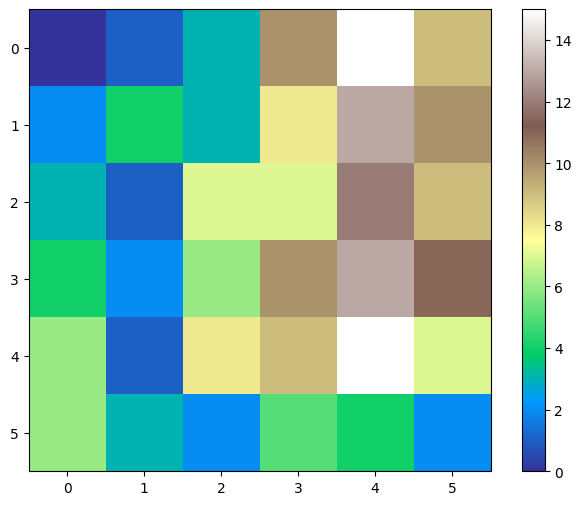

In [17]:
# dataset_dir = "/Users/parsa/Daneshgah/Arshad/Thesis/datasets/pappas_kaggle/archive"
# data_paths = sorted(glob.glob(os.path.join(dataset_dir, "*.png")))
# sample_data_path = data_paths[0]

# # Load the image
# sample_data = iio.imread(sample_data_path, mode='I')[400:500, 400:500]  # 'I' mode ensures reading as uint16
# print(sample_data.dtype)  # This should print 'uint16'

# # Load the image
# sample_data = cv2.imread(sample_data_path, cv2.IMREAD_UNCHANGED)
# print(sample_data.dtype)  # This should print 'uint16'

i = 15
dataset_dir = "/Users/parsa/Daneshgah/Arshad/Thesis/datasets/SRTM_IRAN/data/"
data_paths = sorted(glob.glob(os.path.join(dataset_dir, "*.hgt")))
sample_data_path = data_paths[i]

with rasterio.open(sample_data_path) as src:
    sample_data = src.read(1)[2500:3000, 1500:2000].astype(float)  # Read the first (and only) band
    profile = src.profile  # Get metadata such as CRS, transform, etc.

sample_data = np.array([
    [0, 1, 3, 10, 15, 9],
    [2, 4, 3, 8, 13, 10],
    [3, 1, 7, 7, 12, 9],
    [4, 2, 6, 10, 13, 11],
    [6, 1, 8, 9, 15, 7],
    [6, 3, 2, 5, 4, 2,]]
)
print(sample_data.shape)
print(profile)


print(sample_data_path)
visualize_terrain(sample_data)
# sns.heatmap(sample_data, annot=True, cmap='terrain')


In [18]:
sample_data.min(), sample_data.max(), sample_data.mean()

(0, 15, 6.416666666666667)

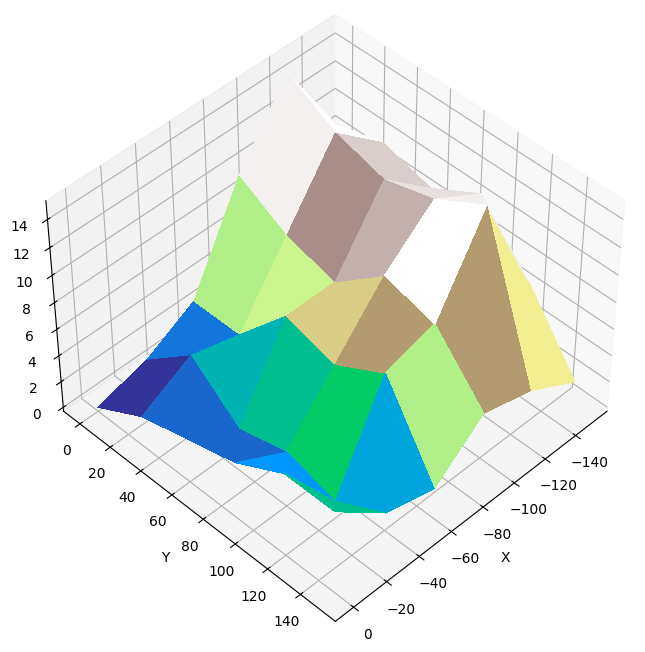

In [19]:

visualize_3d_terrain(sample_data)

In [20]:

# wfc = WaveFunctionCollapse(sample_data, pattern_size=2, grid_size=(20,20), wrap_input=False)
# output_image = wfc.run()

sample_data.shape

(6, 6)

In [21]:
# Calculate the gradient in both the x and y directions
grad_y_np, grad_x_np = np.gradient(sample_data)

grad_x = sample_data[:, 1:] - sample_data[:, :-1]
grad_y = sample_data[1:, :] - sample_data[:-1, :]
grad_x.shape, grad_y.shape

((6, 5), (5, 6))

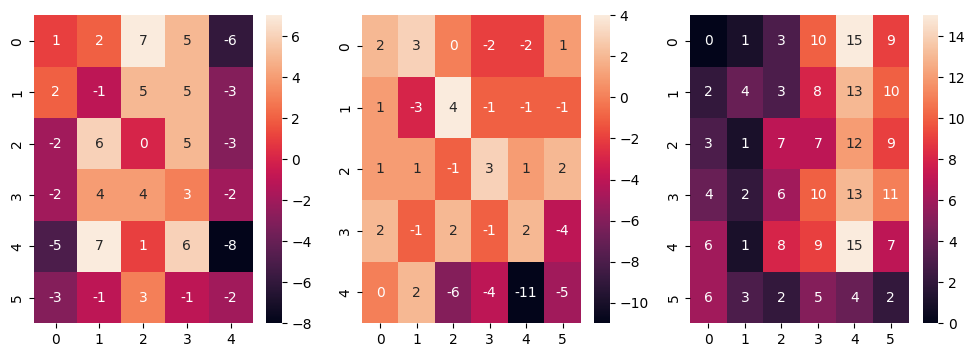

In [22]:
fix, axes = plt.subplots(1, 3, figsize=(12,4))
# im1 = axes[0].imshow(grad_y_np)#, cmap='terrain')
# im2 = axes[1].imshow(grad_y)#, cmap='terrain')

im1 = sns.heatmap(grad_x, ax=axes[0], annot=True)
im2 = sns.heatmap(grad_y, ax=axes[1], annot=True)
im3 = sns.heatmap(sample_data, ax=axes[2], annot=True)

# fix.colorbar(im1, ax=axes[0])
# fix.colorbar(im2, ax=axes[1])

In [9]:
# # Integrate the x-gradient along the x direction
# height_map_x = np.cumsum(grad_x, axis=1)

# # Integrate the y-gradient along the y direction
# height_map_y = np.cumsum(grad_y, axis=0)

# fix, axes = plt.subplots(1, 2, figsize=(8,4))
# # im1 = axes[0].imshow(grad_y_np)#, cmap='terrain')
# # im2 = axes[1].imshow(grad_y)#, cmap='terrain')

# im1 = sns.heatmap(height_map_x, ax=axes[0], annot=True)
# im2 = sns.heatmap(height_map_y, ax=axes[1], annot=True)

# height_map_x.shape, height_map_y.shape



In [10]:
grad_y.shape,grad_x.shape

((499, 500), (500, 499))

[-218.]
False


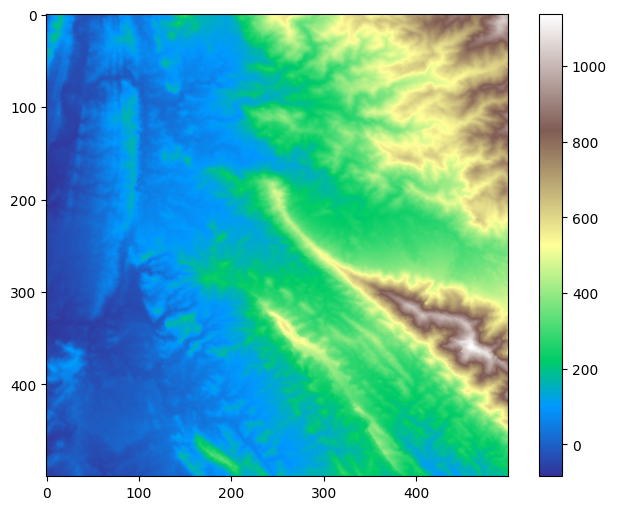

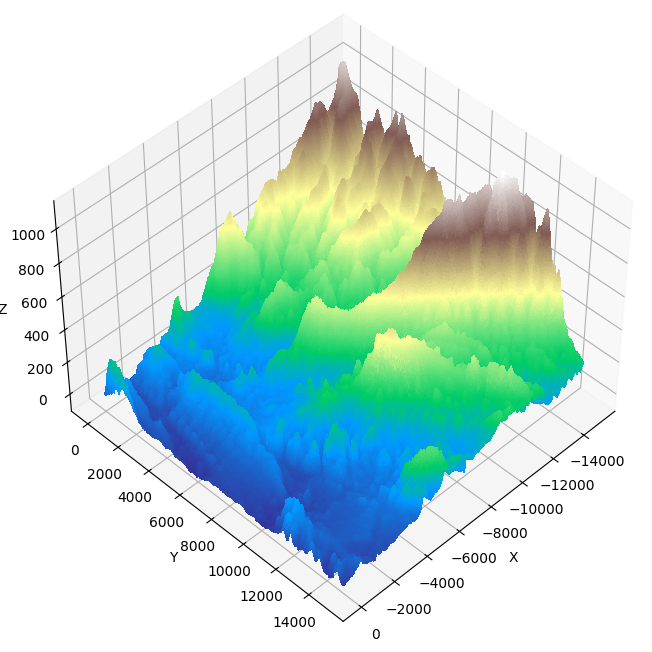

In [14]:
def slopes_to_height(grad_x, grad_y):
    
    hh = np.zeros((
        grad_x.shape[0],
        grad_y.shape[1]
    ))
    
    for y in range(hh.shape[0] - 1):
        for x in range(y+1):
            if x == 0 and y < hh.shape[0]-1:
                hh[y+1, x] = hh[y,x] + grad_y[y,x]
            if x < hh.shape[1] - 1:
                hh[y,x+1] = hh[y,x] + grad_x[y,x]
            if y < hh.shape[1] - 1:
                hh[x,y+1] = hh[x,y] + grad_x[x,y]

        
    hh[-1, :] = hh[-2,:] + grad_y[-1,:]
    return hh

hh = slopes_to_height(grad_x, grad_y)
print(np.unique(hh-sample_data))
print(np.all(hh==sample_data))
# fix, axes = plt.subplots(1, 2, figsize=(8,4))

# im1 = sns.heatmap(hh, ax=axes[0], annot=True)
# im2 = sns.heatmap(sample_data2, ax=axes[1], annot=True)


visualize_terrain(hh)
visualize_3d_terrain(hh)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00,
        3.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00, 5.0000e+00,
        7.0000e+00, 2.0000e+01, 2.1000e+01, 3.2000e+01, 5.4000e+01,
        1.0300e+02, 1.1900e+02, 2.7400e+02, 5.5900e+02, 1.3760e+03,
        3.8540e+03, 1.0742e+04, 3.0015e+04, 6.3005e+04, 8.4067e+04,
        3.3308e+04, 1.3852e+04, 5.1820e+03, 1.7040e+03, 6.2800e+02,
        2.1400e+02, 1.5200e+02, 9.1000e+01, 3.3000e+01, 2.6000e+01,
        2.2000e+01, 1.0000e+01, 4.0000e+00, 3.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-140.  , -135.14, -130.28, -125.42, -120.56, -115.7 , -110.84,
        -105.98, -101.12,  -96.26,  -91.4 ,  -86.54,  -81.68,  -76.82,
         -71.96,  -67.1 ,  -62.24,  -57.38,  -52.52,  -47.66,  -42.8 ,
         -37.94,  -33.08,  -28.22,  -23.36,  -18.5 ,  -13.64,   -8.78,
          -3.92,    0.94,    5.8 ,

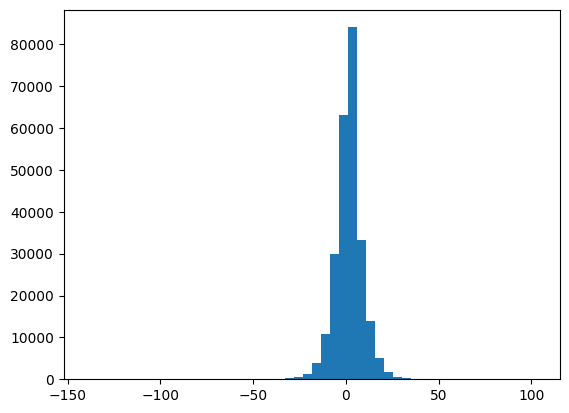

In [16]:
plt.hist(grad_x.flatten(), bins=50)